In [ ]:
!pip install scikit-learn tensorflow


Epoch 1/50
4/4 [==============================] - 1s 3ms/step - loss: 10.1359 - accuracy: 0.3250
Epoch 2/50
4/4 [==============================] - 0s 6ms/step - loss: 9.1987 - accuracy: 0.3250
Epoch 3/50
4/4 [==============================] - 0s 4ms/step - loss: 8.1829 - accuracy: 0.3250
Epoch 4/50
4/4 [==============================] - 0s 4ms/step - loss: 7.2753 - accuracy: 0.3250
Epoch 5/50
4/4 [==============================] - 0s 3ms/step - loss: 6.3616 - accuracy: 0.3250
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 5.3700 - accuracy: 0.3250
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 4.4184 - accuracy: 0.3250
Epoch 8/50
4/4 [==============================] - 0s 3ms/step - loss: 3.5567 - accuracy: 0.3250
Epoch 9/50
4/4 [==============================] - 0s 5ms/step - loss: 2.8520 - accuracy: 0.2583
Epoch 10/50
4/4 [==============================] - 0s 3ms/step - loss: 2.6814 - accuracy: 0.2917
Epoch 11/50
4/4 [=====================

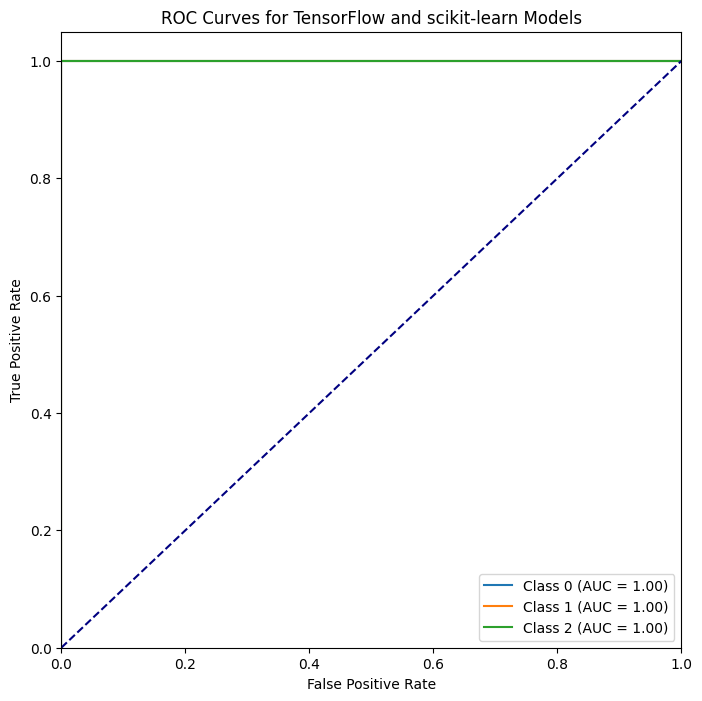

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Iris.csv")  # Replace with your actual file path

# Separate features and target
X = df.drop("Species", axis=1).values
y = df["Species"].values

# Encode string labels (if applicable)
if pd.api.types.is_string_dtype(y):
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TensorFlow model
num_classes = len(np.unique(y))
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Output layer with num_classes neurons for multiclass
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50)

# Get predictions from the TensorFlow model
tensorflow_probabilities = model.predict(X_test)
tensorflow_predictions = np.argmax(tensorflow_probabilities, axis=1)

# Calculate ROC AUC for TensorFlow model
tensorflow_roc_auc = dict()

for i in range(num_classes):
    tensorflow_roc_auc[i] = roc_auc_score(y_test == i, tensorflow_probabilities[:, i])

# Calculate F1 score for TensorFlow model
tensorflow_f1_score = f1_score(y_test, tensorflow_predictions, average='weighted')

# scikit-learn model
model = LogisticRegression(max_iter=1000, verbose=2)
model.fit(X_train, y_train)

# Assuming you have three classes, you need to one-hot encode the target for roc_auc_score
y_test_bin = label_binarize(y_test, classes=np.unique(y))
sklearn_roc_auc = dict()

for i in range(num_classes):
    sklearn_roc_auc[i] = roc_auc_score(y_test_bin[:, i], model.predict_proba(X_test)[:, i])

# Calculate F1 score for scikit-learn model
sklearn_predictions = model.predict(X_test)
sklearn_f1_score = f1_score(y_test, sklearn_predictions, average='weighted')

# Print results
print('TensorFlow ROC AUC:', tensorflow_roc_auc)
print('TensorFlow F1 score:', tensorflow_f1_score)
print('scikit-learn ROC AUC:', sklearn_roc_auc)
print('scikit-learn F1 score:', sklearn_f1_score)

# Visualize ROC curves (optional)
plt.figure(figsize=(8, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], model.predict_proba(X_test)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for TensorFlow and scikit-learn Models')
plt.legend()
plt.show()
